# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
# build url
# Format or url = https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key

url = f"{url}appid={api_key}&units={units}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#  List to hold city data
city_data = []

# print to logger
print("Beginning Data Retrieval")
print("------------------------")

#create counters

record_count = 1
set_count = 1
# Loop through all the cities in list

for index, city in enumerate(cities):
    # Group cities in sets os 50 for loggin purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # log the URL and set number
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        
        # Extract out the max temp, humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list, by making a dictionary
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date              
        })
        
    except (KeyError):
        print("City Not Found. Skipping....")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | amderma
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 2 of set 1 | abha
Processing Record 3 of set 1 | marsh harbour
Processing Record 4 of set 1 | shenjiamen
Processing Record 5 of set 1 | altar
Processing Record 6 of set 1 | la esperanza
Processing Record 7 of set 1 | hithadhoo
Processing Record 8 of set 1 | kodiak
Processing Record 9 of set 1 | albany
Processing Record 10 of set 1 | bluff
Processing Record 11 of set 1 | latung
Processing Record 12 of set 1 | sentyabrskiy
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 13 of set 1 | port elizabeth
Processing Record 14 of set 1 | matagami
Processing Record 15 of set 1 | ngunguru
Processing Record 16 of set 1 | opuwo
Processing Record 17 of set 1 | esperance
Processing Record 18 of set 1 | airai
Processing Record 1

Processing Record 7 of set 4 | oktyabrskoye
Processing Record 8 of set 4 | constitucion
Processing Record 9 of set 4 | deputatskiy
Processing Record 10 of set 4 | elko
Processing Record 11 of set 4 | eyl
Processing Record 12 of set 4 | toulepleu
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 13 of set 4 | sorvag
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 14 of set 4 | port hawkesbury
Processing Record 15 of set 4 | socha
Processing Record 16 of set 4 | namibe
Processing Record 17 of set 4 | yarmouth
Processing Record 18 of set 4 | mount gambier
Processing Record 19 of set 4 | ondorhaan
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 20 of set 4 | san andres
Processing Record 21 of set 4 | urdoma
Processing Record 22 of set 4 | bera
Processing Record 23 of set 4 | vaitape

Processing Record 26 of set 7 | nanakuli
Processing Record 27 of set 7 | mitsamiouli
Processing Record 28 of set 7 | kahului
Processing Record 29 of set 7 | kenai
Processing Record 30 of set 7 | melfort
Processing Record 31 of set 7 | gediz
Processing Record 32 of set 7 | saint-philippe
Processing Record 33 of set 7 | nicoya
Processing Record 34 of set 7 | paengaroa
Processing Record 35 of set 7 | helong
Processing Record 36 of set 7 | nantucket
Processing Record 37 of set 7 | conceicao do mato dentro
Processing Record 38 of set 7 | broome
Processing Record 39 of set 7 | fukue
Processing Record 40 of set 7 | iquique
Processing Record 41 of set 7 | hokitika
Processing Record 42 of set 7 | atasu
Processing Record 43 of set 7 | maltahohe
Processing Record 44 of set 7 | codrington
Processing Record 45 of set 7 | freeport
Processing Record 46 of set 7 | kankan
Processing Record 47 of set 7 | homer
Processing Record 48 of set 7 | mirnyy
Processing Record 49 of set 7 | whitianga
Processing Re

Processing Record 2 of set 11 | muravlenko
Processing Record 3 of set 11 | georgiyevka
Processing Record 4 of set 11 | halifax
Processing Record 5 of set 11 | vilhena
Processing Record 6 of set 11 | raga
Processing Record 7 of set 11 | sao joao da barra
Processing Record 8 of set 11 | gigmoto
Processing Record 9 of set 11 | bogorodskoye
Processing Record 10 of set 11 | teknaf
Processing Record 11 of set 11 | salisbury
Processing Record 12 of set 11 | mullaitivu
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 13 of set 11 | williams lake
Processing Record 14 of set 11 | lolua
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 15 of set 11 | samusu
City Not Found. Skipping....
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 16 of set 11 | carballo
Processing Record 17 of set 11 | champerico
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert all data extracted into a DataFrame

city_data_df = pd.DataFrame(city_data)

In [7]:
# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]


# Exporting data to csv file for vacation challenge
city_data_df.to_csv("city_list.csv")
#, index_label="City_ID")

city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Windspeed     553
Country       553
Date          553
dtype: int64

In [8]:
# Display df
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,abha,18.2164,42.5053,75.85,26,26,11.10,SA,1650024072
1,marsh harbour,26.5412,-77.0636,75.29,81,26,8.23,BS,1650024277
2,shenjiamen,29.9576,122.2980,55.81,75,100,17.22,CN,1650024277
3,altar,30.7000,-111.8167,61.29,11,60,4.32,MX,1650024277
4,la esperanza,14.8667,-91.5667,55.53,88,63,3.24,GT,1650024278


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

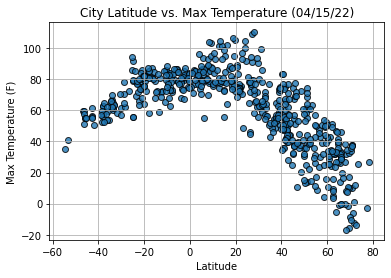

In [9]:
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("city_list_fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

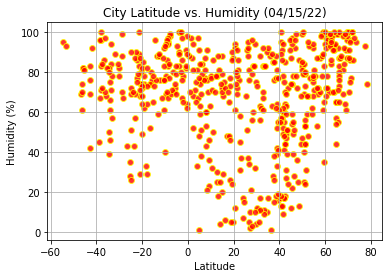

In [10]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor= 'yellow', linewidths=1, marker="o", 
            color ='red',
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("city_list_fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

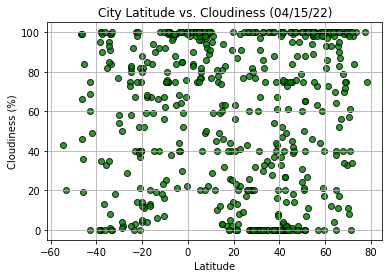

In [11]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            color = "green",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("city_list_fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

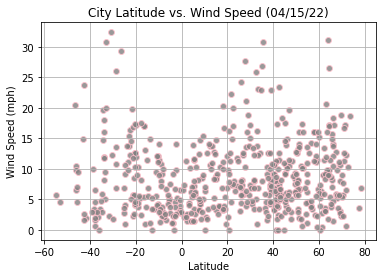

In [12]:
# Build the scatter plots for each city types
plt.scatter(city_data_df["Lat"], 
            city_data_df["Windspeed"],
            edgecolor="pink", linewidths=1, marker="o",
            color = "grey",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("city_list_fig4.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression